In [5]:
from pathlib import Path 
import sys
import os

sys.path.insert(0, '../stepselector')

from convert_npy_to_xarray import convert_npy_dir_to_zarr, summarize_written
import zarr_inspect as zi

In [6]:
# SET UP FILE PATHS
server_mount = '/home/blair/server/herd_hover'
data_folder = os.path.join(server_mount, 'zebra_movement_data')

# REQUIRED: Folder containing the .npy files to be converted (one .npy per observation)
# NPY filenames should include the observation name (e.g. 'observation001')
# NPY arrays should have shape (t, f, 2), where t = number of tracks in the observation and f = number of frames. 
raw = os.path.join(data_folder, 'raw_tracks')

# REQUIRED: folder where the generated .zarr files should be stored
out = os.path.join(data_folder, 'tracks_zarr')

# OPTIONAL: .csv file containing observation-level metadata
# CSV must contain a column called "observation" with the observation name in the same format used in the .npy filename
ob_metadata_file = os.path.join(data_folder, 'observation_metadata.csv')

# OPTIONAL: .csv file containing track-level metadata
# CSV must contain a column called "observation" with the observation name in the same format used in the .npy filename
# CSV must contain a column called "track" that has track numbers in integer format, corresponding to the t dimension of the .npy arrays
track_metadata_file = os.path.join(data_folder, 'track_metadata.csv')

In [3]:
# SPECIFY OBSERVATION NAMING SYSTEM
# e.g. r"(observation\d+)" will capture observations named as 'observation001'; r"(ob\d+)" will capture observations named as 'ob001'. 
# observation naming system should be consistent between .npy file names and the 'observation' columns in metadata .csvs
regex = r"(ob\d+)"

In [4]:
# RUN CONVERSION FUNCTION

written = convert_npy_dir_to_zarr(
    raw_tracks_directory = raw,
    output_directory = out,
    obs_name_regex = regex,
    coord_names = ['easting', 'northing'], # change to match the data in the .npy files
    float_dtype = 'float32',
    chunk_tracks = 1,
    chunk_frames = 2048,
    observation_metadata_csv = ob_metadata_file, # change to None if you don't wish to read in observation-level metadata
    observation_usecols = None, # provide list of column names if you don't want to read in all columns in observation metadata .csv
    track_metadata_csv = track_metadata_file, # change to None if you don't wish to read in track-level metadata
    track_usecols = None, # provide list of column names if you don't want to read in all columns in track metadata .csv
    include_observations = None, # If you only want to process some of the .npy files, provide a list of observations to process 
    normalize_observation_names= True # set to False unless you are Blair - specific functionality for dealing with Blair's poor decisions regarding observation naming
)

summarize_written(written, mode="names")

Wrote 14 stores to /home/blair/server/herd_hover/zebra_movement_data/tracks_zarr: observation015, observation019, observation027, observation028, observation034, observation036, observation044, observation053, observation066, observation074, observation083, observation088, observation090, observation108


In [5]:
# RUN SOME QUICK CHECKS OF THE OUTPUT
zi.set_zarr_root(out) # the directory where you saved the zarr files

# List the converted observations
zi.list_observations()

['observation015',
 'observation019',
 'observation027',
 'observation028',
 'observation034',
 'observation036',
 'observation044',
 'observation053',
 'observation066',
 'observation074',
 'observation083',
 'observation088',
 'observation090',
 'observation108']

In [19]:
# Summarize an observation
zi.summarize_observation('observation108')

Observation: observation108
  tracks: 46
  frames: 25750
  location components: easting, northing

Observation-level attributes:
  - big_map: newclifford1_2_3_merge_ob108
  - site: mpala
  - date: 4/16/18
  - observer_lat: 0.376622019
  - observer_lon: 36.92412516
  - observer_easting: 268961.17255093023
  - observer_northing: 41655.57576996011
  - observer_utm_zone_number: 37
  - observer_utm_zone_letter: N
  - scare: False
  - scare_frame: None
  - scare_track: None
  - utm_zone: 37N

Track-level metadata columns:
  age, individual_ID, species


In [21]:
# Display track metadata
zi.show_track_metadata('observation108', track = 3)

observation108 — track index 003
  label: observation108_track003
  track_index: 3
  age: adult
  individual_ID: 108-003
  species: gz


{'label': 'observation108_track003',
 'track_index': 3,
 'age': 'adult',
 'individual_ID': '108-003',
 'species': 'gz'}

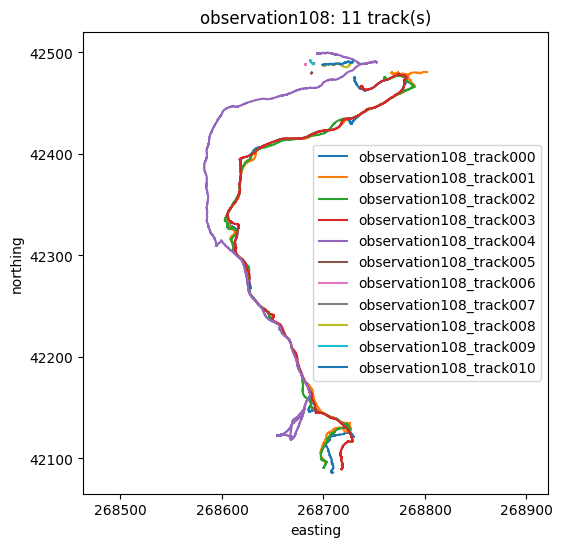

<Axes: title={'center': 'observation108: 11 track(s)'}, xlabel='easting', ylabel='northing'>

In [27]:
# Plot some tracks
zi.plot_tracks('observation108', tracks=[0,1,2,3,4,5,6,7,8,9,10], max_points=None)